## Get the data

In [1]:
import os

os.environ

environ{'HOSTNAME': '9443a819c3c5',
        'NVIDIA_REQUIRE_CUDA': 'cuda>=9.0',
        'TERM': 'xterm-color',
        'AWS_CREDENTIALS': '/run/secrets/aws_credentials',
        'LS_COLORS': 'rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01;35:bd=40;33;01:cd=40;33;01:or=40;31;01:mi=00:su=37;41:sg=30;43:ca=30;41:tw=30;42:ow=34;42:st=37;44:ex=01;32:*.tar=01;31:*.tgz=01;31:*.arc=01;31:*.arj=01;31:*.taz=01;31:*.lha=01;31:*.lz4=01;31:*.lzh=01;31:*.lzma=01;31:*.tlz=01;31:*.txz=01;31:*.tzo=01;31:*.t7z=01;31:*.zip=01;31:*.z=01;31:*.Z=01;31:*.dz=01;31:*.gz=01;31:*.lrz=01;31:*.lz=01;31:*.lzo=01;31:*.xz=01;31:*.bz2=01;31:*.bz=01;31:*.tbz=01;31:*.tbz2=01;31:*.tz=01;31:*.deb=01;31:*.rpm=01;31:*.jar=01;31:*.war=01;31:*.ear=01;31:*.sar=01;31:*.rar=01;31:*.alz=01;31:*.ace=01;31:*.zoo=01;31:*.cpio=01;31:*.7z=01;31:*.rz=01;31:*.cab=01;31:*.jpg=01;35:*.jpeg=01;35:*.gif=01;35:*.bmp=01;35:*.pbm=01;35:*.pgm=01;35:*.ppm=01;35:*.tga=01;35:*.xbm=01;35:*.xpm=01;35:*.tif=01;35:*.tiff=01;35:*.png=01;35:*.svg=

In [2]:
import json
import os

credentials = json.load(open(os.environ["PROD_SQL_CREDENTIALS"]))

In [3]:
from aquabyte.data_access_utils import RDSAccessUtils

s3 = RDSAccessUtils(credentials)

In [4]:
query = """SELECT * FROM keypoint_annotations WHERE (pen_id = 64) AND (captured_at > '2019-11-12')"""

keypoint_table = s3.extract_from_database(query)
keypoint_table

,id,fish_detection_id,annotated_by_email,is_qa,is_skipped,is_blurry,is_dark,is_occluded,is_bad_orientation,is_partial,...,site_id,pen_id,left_image_url,right_image_url,left_crop_metadata,right_crop_metadata,camera_metadata,captured_at,is_obscured_floy_tag,is_floy_tag_not_present
0,1010858,None,bati17@cogitotech.com,False,True,False,False,False,True,False,...,42,64,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2970, 'height': 1295, 'floyTag': Non...","{'width': 3092, 'height': 1292, 'floyTag': Non...","{'baseline': 0.10099903307848877, 'focalLength...",2019-11-24 01:28:07.054000+00:00,False,None
1,1010646,None,bati9@cogitotech.com,False,True,False,False,False,True,False,...,42,64,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2772, 'height': 1281, 'floyTag': Non...","{'width': 2850, 'height': 1272, 'floyTag': Non...","{'baseline': 0.10099903307848877, 'focalLength...",2019-11-24 01:28:08.156000+00:00,True,None
2,1010630,None,bati2@cogitotech.com,False,True,False,False,False,False,True,...,42,64,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 3044, 'height': 1018, 'floyTag': Non...","{'width': 3143, 'height': 984, 'floyTag': None...","{'baseline': 0.10099903307848877, 'focalLength...",2019-11-24 01:44:43.302000+00:00,False,None
3,1010917,None,bati14@cogitotech.com,False,False,None,None,None,None,None,...,42,64,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2467, 'height': 1069, 'floyTag': Non...","{'width': 2200, 'height': 1102, 'floyTag': Non...","{'baseline': 0.10099903307848877, 'focalLength...",2019-11-24 01:50:42.868000+00:00,None,None
4,1010870,None,bati14@cogitotech.com,False,False,None,None,None,None,None,...,42,64,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2989, 'height': 1175, 'floyTag': Non...","{'width': 2733, 'height': 1143, 'floyTag': Non...","{'baseline': 0.10099903307848877, 'focalLength...",2019-11-24 01:50:43.945000+00:00,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14254,1023685,None,bati17@cogitotech.com,False,False,None,None,None,None,None,...,42,64,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 1714, 'height': 734, 'floyTag': 'BBB...","{'width': 1691, 'height': 745, 'floyTag': 'BBB...","{'baseline': 0.10172099116469037, 'focalLength...",2019-12-03 14:17:14.069000+00:00,None,None
14255,1023677,None,bati17@cogitotech.com,False,False,None,None,None,None,None,...,42,64,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 1707, 'height': 764, 'floyTag': 'BBB...","{'width': 1578, 'height': 728, 'floyTag': 'BBB...","{'baseline': 0.10172099116469037, 'focalLength...",2019-12-03 14:17:15.184000+00:00,None,None
14256,1023686,None,bati12@cogitotech.com,False,False,None,None,None,None,None,...,42,64,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2016, 'height': 743, 'floyTag': 'BWW...","{'width': 1968, 'height': 765, 'floyTag': 'BWW...","{'baseline': 0.10172099116469037, 'focalLength...",2019-12-03 14:18:56.875000+00:00,None,None
14257,1023678,None,bati12@cogitotech.com,False,False,None,None,None,None,None,...,42,64,https://aquabyte-crops.s3.eu-west-1.amazonaws....,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 1977, 'height': 764, 'floyTag': 'BWW...","{'width': 1960, 'height': 758, 'floyTag': 'BWW...","{'baseline': 0.10172099116469037, 'focalLength...",2019-12-03 14:18:59.071000+00:00,None,None


## Clean the frame

In [23]:
keypoint_table.shape

(5390, 29)

In [24]:
keypoint_table = keypoint_table[keypoint_table.keypoints.notnull()]
keypoint_table.keypoints.iloc[0]

{'version': 2,
 'leftCrop': [{'xCrop': 2193,
   'yCrop': 477,
   'xFrame': 3512,
   'yFrame': 884,
   'keypointType': 'UPPER_LIP'},
  {'xCrop': 1934,
   'yCrop': 500,
   'xFrame': 3253,
   'yFrame': 907,
   'keypointType': 'EYE'},
  {'xCrop': 1063,
   'yCrop': 181,
   'xFrame': 2382,
   'yFrame': 588,
   'keypointType': 'DORSAL_FIN'},
  {'xCrop': 546,
   'yCrop': 312,
   'xFrame': 1865,
   'yFrame': 719,
   'keypointType': 'ADIPOSE_FIN'},
  {'xCrop': 432,
   'yCrop': 352,
   'xFrame': 1751,
   'yFrame': 759,
   'keypointType': 'UPPER_PRECAUDAL_PIT'},
  {'xCrop': 349,
   'yCrop': 417,
   'xFrame': 1668,
   'yFrame': 824,
   'keypointType': 'HYPURAL_PLATE'},
  {'xCrop': 309,
   'yCrop': 406,
   'xFrame': 1628,
   'yFrame': 813,
   'keypointType': 'TAIL_NOTCH'},
  {'xCrop': 429,
   'yCrop': 518,
   'xFrame': 1748,
   'yFrame': 925,
   'keypointType': 'LOWER_PRECAUDAL_PIT'},
  {'xCrop': 614,
   'yCrop': 676,
   'xFrame': 1933,
   'yFrame': 1083,
   'keypointType': 'ANAL_FIN'},
  {'xCrop': 

In [25]:
keypoint_table.shape

(5390, 29)

We need camera metadata to calculate world coordinates

In [26]:
keypoint_table.camera_metadata.iloc[0]

{'baseline': 0.10099903307848877,
 'focalLength': 0.013724068458410984,
 'pixelCountWidth': 4096,
 'focalLengthPixel': 3977.99085751043,
 'imageSensorWidth': 0.01412,
 'pixelCountHeight': 3000,
 'imageSensorHeight': 0.01035,
 'stereoParametersUrl': 'http://aquabyte-stereo-parameters.s3.eu-west-1.amazonaws.com/L40013180_R40012648/2019-11-11T00:00:00Z_L40013180_R40012648_stereo-parameters.json'}

In [27]:
import numpy as np

def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))


def convert_to_world_point(x, y, d, parameters):
    """ from pixel coordinates to world coordinates """
    # get relevant parameters
    pixel_count_width = parameters["pixelCountWidth"]
    pixel_count_height = parameters["pixelCountHeight"]
    sensor_width = parameters["imageSensorWidth"]
    sensor_height = parameters["imageSensorHeight"]
    focal_length = parameters["focalLength"]

    image_center_x = pixel_count_width / 2.0
    image_center_y = pixel_count_height / 2.0
    px_x = x - image_center_x
    px_z = image_center_y - y

    sensor_x = px_x * (sensor_width / pixel_count_width)
    sensor_z = px_z * (sensor_height / pixel_count_height)

    # now move to world coordinates
    world_y = d
    world_x = (world_y * sensor_x) / focal_length
    world_z = (world_y * sensor_z) / focal_length
    return np.array([world_x, world_y, world_z])


def depth_from_disp(disp, parameters):
    """ calculate the depth of the point based on the disparity value """
    focal_length_pixel = parameters["focalLengthPixel"]

    baseline = parameters["baseline"]
    depth = focal_length_pixel * baseline / np.array(disp)
    return depth


def pixel2world(keypoints, camera_metadata):
    """2D pixel coordinates to 3D world coordinates"""
    left_crop = keypoints['leftCrop']
    right_crop = keypoints['rightCrop']

    # first create a dic with crop keypoints
    image_coordinates = {"leftCrop": {},
                         "rightCrop": {}}
    for keypoint in left_crop:
        name = keypoint["keypointType"]
        image_coordinates["leftCrop"][name] = [keypoint["xFrame"], keypoint["yFrame"]]
    for keypoint in right_crop:
        name = keypoint["keypointType"]
        image_coordinates["rightCrop"][name] = [keypoint["xFrame"], keypoint["yFrame"]]

    # then loop through the right crop keypoints and calculate the world coordinates
    world_coordinates = {}
    for keypoint in left_crop:
        name = keypoint["keypointType"]
        disparity = image_coordinates["leftCrop"][name][0] - image_coordinates["rightCrop"][name][0]
        depth = depth_from_disp(disparity, camera_metadata)
        world_point = convert_to_world_point(image_coordinates["leftCrop"][name][0],
                                             image_coordinates["leftCrop"][name][1],
                                             depth,
                                             camera_metadata)
        world_coordinates[name] = world_point
    return world_coordinates

In [28]:
from functools import partial

def check_dict(d, required_keys):
    for k in required_keys:
        if k not in d:
            return False
    return True

check_keypoints = partial(check_dict, required_keys=['leftCrop', 'rightCrop'])
keypoint_table[keypoint_table['keypoints'].apply(check_keypoints)]

,id,fish_detection_id,annotated_by_email,is_qa,is_skipped,is_blurry,is_dark,is_occluded,is_bad_orientation,is_partial,...,right_image_url,left_crop_metadata,right_crop_metadata,camera_metadata,captured_at,is_obscured_floy_tag,is_floy_tag_not_present,world_points,distance,day_of_year
3,1010917,None,bati14@cogitotech.com,False,False,None,None,None,None,None,...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2467, 'height': 1069, 'floyTag': Non...","{'width': 2200, 'height': 1102, 'floyTag': Non...","{'baseline': 0.10099903307848877, 'focalLength...",2019-11-24 01:50:42.868000+00:00,None,None,"{'UPPER_LIP': [0.2301330103022885, 0.625815000...",0.835287,328
4,1010870,None,bati14@cogitotech.com,False,False,None,None,None,None,None,...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2989, 'height': 1175, 'floyTag': Non...","{'width': 2733, 'height': 1143, 'floyTag': Non...","{'baseline': 0.10099903307848877, 'focalLength...",2019-11-24 01:50:43.945000+00:00,None,None,"{'UPPER_LIP': [0.2601235260345291, 0.593461196...",0.780142,328
8,1011025,None,bati10@cogitotech.com,False,False,None,None,None,None,None,...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 3398, 'height': 1397, 'floyTag': 'BB...","{'width': 3475, 'height': 1392, 'floyTag': 'BB...","{'baseline': 0.10099903307848877, 'focalLength...",2019-11-24 02:06:56.970000+00:00,None,None,"{'UPPER_LIP': [0.29788500112503113, 0.69271246...",0.621940,328
14,1010970,None,bati2@cogitotech.com,False,False,None,None,None,None,None,...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 3515, 'height': 1371, 'floyTag': Non...","{'width': 3824, 'height': 1306, 'floyTag': Non...","{'baseline': 0.10099903307848877, 'focalLength...",2019-11-24 02:18:08.331000+00:00,None,None,"{'UPPER_LIP': [-0.19185119359110053, 0.6975229...",0.676386,328
16,1010965,None,bati9@cogitotech.com,False,False,None,None,None,None,None,...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2069, 'height': 853, 'floyTag': 'BBW...","{'width': 2148, 'height': 853, 'floyTag': 'BBW...","{'baseline': 0.10099903307848877, 'focalLength...",2019-11-24 02:25:59.626000+00:00,None,None,"{'UPPER_LIP': [0.0031848200087101716, 0.792452...",1.017147,328
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14253,1023696,None,bati1@cogitotech.com,False,False,None,None,None,None,None,...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2122, 'height': 814, 'floyTag': 'BWW...","{'width': 2121, 'height': 817, 'floyTag': 'BWW...","{'baseline': 0.10172099116469037, 'focalLength...",2019-12-03 14:11:45.197000+00:00,None,None,"{'UPPER_LIP': [-0.4693299839330413, 1.28411141...",1.280099,337
14254,1023685,None,bati17@cogitotech.com,False,False,None,None,None,None,None,...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 1714, 'height': 734, 'floyTag': 'BBB...","{'width': 1691, 'height': 745, 'floyTag': 'BBB...","{'baseline': 0.10172099116469037, 'focalLength...",2019-12-03 14:17:14.069000+00:00,None,None,"{'UPPER_LIP': [-0.15966341572178863, 1.6127226...",1.545779,337
14255,1023677,None,bati17@cogitotech.com,False,False,None,None,None,None,None,...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 1707, 'height': 764, 'floyTag': 'BBB...","{'width': 1578, 'height': 728, 'floyTag': 'BBB...","{'baseline': 0.10172099116469037, 'focalLength...",2019-12-03 14:17:15.184000+00:00,None,None,"{'UPPER_LIP': [-0.2407064574180341, 1.58771915...",1.505998,337
14256,1023686,None,bati12@cogitotech.com,False,False,None,None,None,None,None,...,https://aquabyte-crops.s3.eu-west-1.amazonaws....,"{'width': 2016, 'height': 743, 'floyTag': 'BWW...","{'width': 1968, 'height': 765, 'floyTag': 'BWW...","{'baseline': 0.10172099116469037, 'focalLength...",2019-12-03 14:18:56.875000+00:00,None,None,"{'UPPER_LIP': [-0.15842876163612257, 1.4577634...",1.292213,337


In [29]:
keypoint_table = keypoint_table[keypoint_table['keypoints'].apply(check_keypoints)]
keypoint_table.shape

(5390, 29)

## Convert keypoint to world units

In [30]:
keypoint_table.head().apply(lambda row: pixel2world(row['keypoints'], row['camera_metadata']), axis=1)

3     {'UPPER_LIP': [0.2301330103022885, 0.625815000...
4     {'UPPER_LIP': [0.2601235260345291, 0.593461196...
8     {'UPPER_LIP': [0.29788500112503113, 0.69271246...
14    {'UPPER_LIP': [-0.19185119359110053, 0.6975229...
16    {'UPPER_LIP': [0.0031848200087101716, 0.792452...
dtype: object

In [31]:
from tqdm import tqdm

tqdm.pandas()

keypoint_table['world_points'] = keypoint_table.progress_apply(lambda row: pixel2world(row['keypoints'], row['camera_metadata']), axis=1)

100%|██████████| 5390/5390 [00:01<00:00, 3106.70it/s]


In [32]:
import numpy as np

def kp2dist(kp):
    ys = [coord[1] for coord in kp.values()]
    return np.median(ys)

print(keypoint_table['world_points'].iloc[0])
kp2dist(keypoint_table['world_points'].iloc[0])

{'UPPER_LIP': array([0.23013301, 0.625815  , 0.09690873]), 'EYE': array([0.189125  , 0.62484173, 0.0931453 ]), 'DORSAL_FIN': array([0.05944787, 0.70859476, 0.16245347]), 'ADIPOSE_FIN': array([-0.03839537,  0.83528738,  0.16399219]), 'UPPER_PRECAUDAL_PIT': array([-0.06781208,  0.90898921,  0.16932191]), 'HYPURAL_PLATE': array([-0.08775564,  0.91938954,  0.15623649]), 'TAIL_NOTCH': array([-0.10140185,  0.96117998,  0.16599602]), 'LOWER_PRECAUDAL_PIT': array([-0.06773086,  0.89882154,  0.12992046]), 'ANAL_FIN': array([-0.02443302,  0.84583838,  0.08866652]), 'PELVIC_FIN': array([0.02902369, 0.75521284, 0.05904267]), 'PECTORAL_FIN': array([0.1463162 , 0.6501185 , 0.06406411])}


0.8352873808807106

### See depth distribution to make sure mean is the right metric/focus dist

Text(0.5, 0, 'depth')

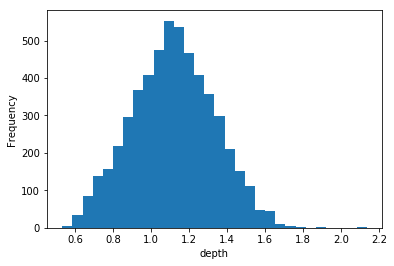

In [33]:
import matplotlib.pyplot as plt

keypoint_table['distance'] = keypoint_table['world_points'].apply(kp2dist)
keypoint_table['distance'].plot.hist(bins=30)
plt.xlabel('depth')

In [34]:
keypoint_table['distance'].mean()

1.116030773602124

In [35]:
keypoint_table['distance'].median()

1.116162239333961

## Check stability over time

In [36]:
keypoint_table['day_of_year'] = keypoint_table.captured_at.apply(lambda x: x.dayofyear)

Text(0, 0.5, 'mean depth')

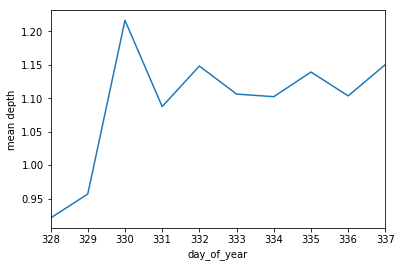

In [37]:
keypoint_table.groupby('day_of_year')['distance'].aggregate('mean').plot()
plt.ylabel('mean depth')